In [1]:
#import all the necessary libraries

import pandas as pd
import numpy as np

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
# read the dataset first
df = pd.read_csv("Country-data.csv")
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [4]:
df['gdpp'] = df['gdpp'].astype(float)
df['income'] = df['income'].astype(float)

### We don't have any NULL or blank value in our 167 rows
### Changed all data type to float 

In [5]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


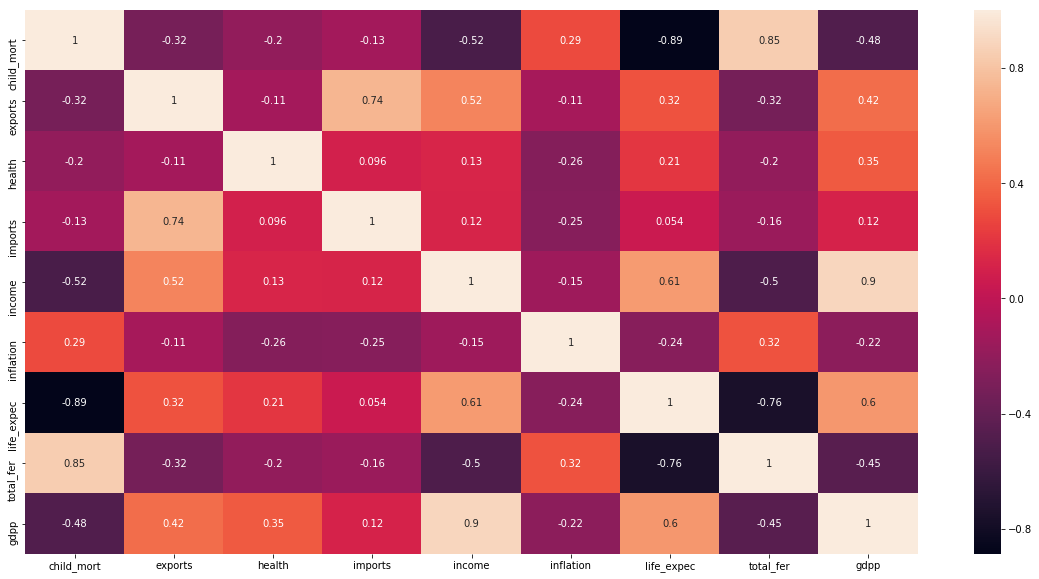

In [6]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(df.corr(),annot = True)
plt.show()

## It's evident GDPP is higly positively correlated with Income, child_mort with total_fer and imports with export

## We are doing unsupervised learning and here we need ID column which will be the country column for us and we don't need any additional ID column for this

### Check if the data have some null values

In [7]:
# Number of nulls per column
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x16c07d80860>,
 'caps': [<matplotlib.lines.Line2D at 0x16c07d80ef0>,
 'boxes': [<matplotlib.lines.Line2D at 0x16c07d80438>],
 'medians': [<matplotlib.lines.Line2D at 0x16c07d905c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x16c07d90908>],
 'means': []}

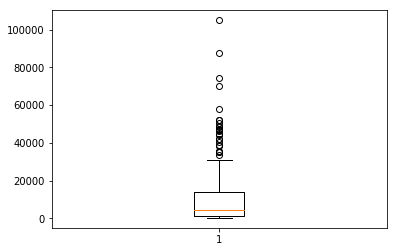

In [8]:
plt.boxplot(df.gdpp)

## child_mort is negatively correlated with gdpp, income, life_expec and others part from total_fer. Hence we can consider to remove the outliers for HIGH gdpp ONLY

{'whiskers': [<matplotlib.lines.Line2D at 0x16c078e94a8>,
 'caps': [<matplotlib.lines.Line2D at 0x16c078e9b38>,
 'boxes': [<matplotlib.lines.Line2D at 0x16c078e9080>],
 'medians': [<matplotlib.lines.Line2D at 0x16c078e9f60>],
 'fliers': [<matplotlib.lines.Line2D at 0x16c078f4550>],
 'means': []}

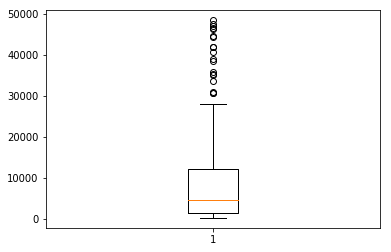

In [9]:
Q1 = df.gdpp.quantile(0.05)
Q3 = df.gdpp.quantile(0.95)
#IQR = Q3-Q1
df = df[(df.gdpp<=Q3)]
plt.boxplot(df.gdpp)
#(pca_df2.PC2>=Q1) & 

In [10]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,40.196203,39.447462,6.688671,46.378265,14614.955696,8.099367,69.966456,3.009620,9913.379747
std,40.622685,25.243334,2.683807,23.229783,15224.031790,10.759661,8.780099,1.533079,12717.283188
min,2.600000,0.109000,1.970000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,10.300000,23.575000,4.872500,30.475000,3290.000000,1.935000,64.150000,1.810000,1310.000000
50%,20.900000,34.000000,6.105000,43.250000,9790.000000,5.460000,71.850000,2.530000,4480.000000
75%,62.500000,50.675000,8.250000,58.475000,20100.000000,11.175000,76.400000,4.200000,12075.000000
max,208.000000,200.000000,17.900000,174.000000,80600.000000,104.000000,82.800000,7.490000,48400.000000


### Comparision of df after removing all HIGH values of gdpp by .95 percentile

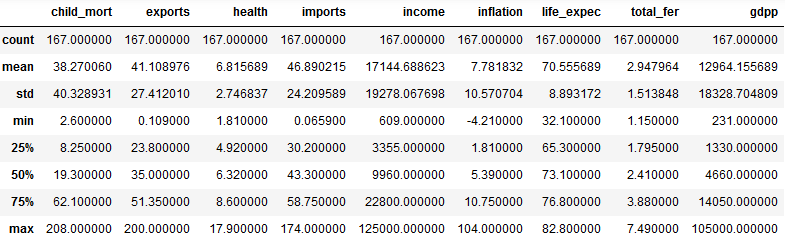

### Let's keep the country for future use

In [11]:
# Let's preserve the Country column to some variable, so that we can make use of it later after perfroming PCA
Country = df['country']
# Now let's drop the ID column as it is not a predictor in our data.
df_WOC = df.drop(['country'], axis =1)
df_WOC.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0
1,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0
2,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0
3,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0
4,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0


### We will use standard scaler to standardise the data and try to identify what's the max of the array

In [12]:
## Let's scale the data with 9 columns
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
df_SS = standard_scaler.fit_transform(df_WOC)

In [14]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver = 'randomized', random_state =42)

In [15]:
#Performing the PCA
pca.fit(df_SS)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [16]:
#first coponent of the first vector obtained from pca.components_
pca.components_[0][0]

-0.42903052455789914

In [17]:
pca.components_

array([[-4.29030525e-01,  2.55209832e-01,  1.34178285e-01,
         1.31450432e-01,  4.07693446e-01, -1.79172211e-01,
         4.31281152e-01, -4.14623599e-01,  3.99105167e-01],
       [ 1.11571336e-01,  6.26379514e-01, -2.77405040e-01,
         6.77160121e-01, -2.31878558e-02, -5.16544119e-02,
        -1.67479074e-01,  7.48372976e-02, -1.51147079e-01],
       [-4.15586874e-02,  1.65804096e-01, -6.21898369e-01,
        -3.00546950e-01,  2.52933247e-01,  6.41231036e-01,
         1.20926305e-01,  5.91157438e-03,  6.23316904e-02],
       [ 3.78896334e-01,  1.25334264e-01,  4.18106890e-01,
         3.92312068e-02,  4.08208237e-01,  2.46846528e-01,
        -2.31647606e-01,  3.66642523e-01,  4.98720267e-01],
       [-2.10302855e-01,  2.05622263e-02,  4.97644383e-01,
         2.62211666e-01, -2.60517467e-01,  6.88800973e-01,
         1.29156175e-01, -1.65619335e-01, -2.29167627e-01],
       [ 1.86245017e-01, -5.01345979e-02, -4.28272915e-03,
        -4.26434872e-02,  1.45028292e-01,  6.489172

In [18]:
#What is the variance explained by the first principal component
pca.explained_variance_ratio_

array([0.45480475, 0.1766364 , 0.13336189, 0.10604223, 0.07260472,
       0.02594781, 0.01392215, 0.01011373, 0.00656633])

### Scree plot

Text(0, 0.5, 'Cumulative Variance')

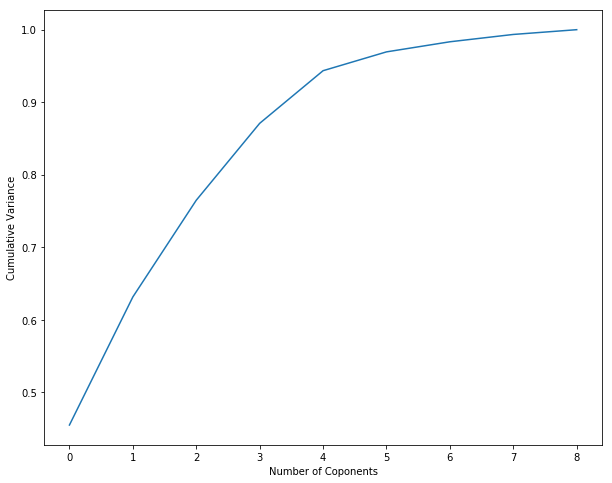

In [19]:
#Plotting the scree plot
%matplotlib inline
fig = plt.figure(figsize = (10,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Coponents')
plt.ylabel('Cumulative Variance')

### We can derive from the above scree plot 95% of PCs we can go about 5

In [21]:
#Finally let's go ahead and do dimenstionality reduction
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components = 5)

In [22]:
# Transform the data here
df_pca = pca_final.fit_transform(df_SS)
df_pca.shape

(158, 5)

In [23]:
#Creating a transpose so that the each column is properly arranged
pc = np.transpose(df_pca)

In [24]:
#Let's add back the ID to the given principal components
df_pca2 = pd.DataFrame({'country': list(Country), 'PC1': pc[0], 'PC2':pc[1], 'PC3': pc[2], 'PC4':pc[3], 'PC5':pc[4]})

In [25]:
df_pca2.head()

,country,PC1,PC2,PC3,PC4,PC5
0,Afghanistan,-2.899440,-0.210920,-0.794008,0.808073,-0.151098
1,Albania,0.571663,-0.365855,-0.285368,-1.233879,0.278467
2,Algeria,-0.082299,-0.334262,1.307774,-0.813505,0.215401
3,Angola,-2.830780,1.451765,1.559083,1.124602,-0.375038
4,Antigua and Barbuda,1.295018,0.323543,-0.154906,-0.664375,-0.173215


{'whiskers': [<matplotlib.lines.Line2D at 0x16c0793a978>,
 'caps': [<matplotlib.lines.Line2D at 0x16c0793ada0>,
 'boxes': [<matplotlib.lines.Line2D at 0x16c0793a550>],
 'medians': [<matplotlib.lines.Line2D at 0x16c0783a6d8>],
 'fliers': [<matplotlib.lines.Line2D at 0x16c0783aa20>],
 'means': []}

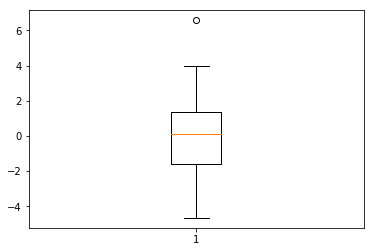

In [26]:
# For PC1
plt.boxplot(df_pca2.PC1)

{'whiskers': [<matplotlib.lines.Line2D at 0x16c07cddbe0>,
 'caps': [<matplotlib.lines.Line2D at 0x16c07cac2b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x16c07cdd7b8>],
 'medians': [<matplotlib.lines.Line2D at 0x16c07cac940>],
 'fliers': [<matplotlib.lines.Line2D at 0x16c07cacc88>],
 'means': []}

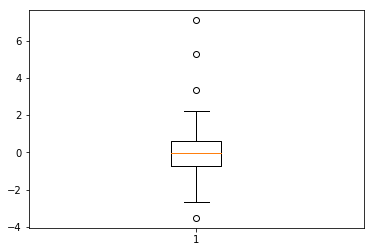

In [27]:
# For PC2
plt.boxplot(df_pca2.PC2)

{'whiskers': [<matplotlib.lines.Line2D at 0x16c07d07e80>,
 'caps': [<matplotlib.lines.Line2D at 0x16c07bb0550>,
 'boxes': [<matplotlib.lines.Line2D at 0x16c07d07a58>],
 'medians': [<matplotlib.lines.Line2D at 0x16c07bb0be0>],
 'fliers': [<matplotlib.lines.Line2D at 0x16c07bb0f28>],
 'means': []}

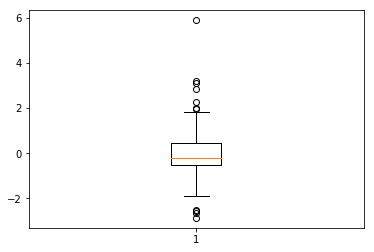

In [28]:
# For PC3
plt.boxplot(df_pca2.PC3)

{'whiskers': [<matplotlib.lines.Line2D at 0x16c07bf7fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x16c07c03978>,
 'boxes': [<matplotlib.lines.Line2D at 0x16c07bf7e80>],
 'medians': [<matplotlib.lines.Line2D at 0x16c07c03da0>],
 'fliers': [<matplotlib.lines.Line2D at 0x16c07c0e390>],
 'means': []}

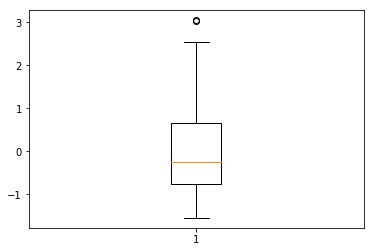

In [29]:
# For PC4
plt.boxplot(df_pca2.PC4)

{'whiskers': [<matplotlib.lines.Line2D at 0x16c07c56710>,
 'caps': [<matplotlib.lines.Line2D at 0x16c07c56da0>,
 'boxes': [<matplotlib.lines.Line2D at 0x16c07c562e8>],
 'medians': [<matplotlib.lines.Line2D at 0x16c07c61470>],
 'fliers': [<matplotlib.lines.Line2D at 0x16c07c617b8>],
 'means': []}

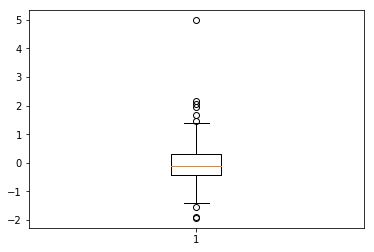

In [30]:
# For PC5
plt.boxplot(df_pca2.PC5)

### While we review all the 5 PCs we can see there are some outliers, unfortunately we can't derive anything from here. Hence we are not removing those 

In [31]:
#Q1 = df_pca2.PC3.quantile(0.05)
#Q3 = df_pca2.PC3.quantile(0.95)
#IQR = Q3-Q1
#df_pca2 = df_pca2[(df_pca2.PC3>=Q1) & (df_pca2.PC3<=Q3)]
#plt.boxplot(df_pca2.PC3)

In [33]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

## Hopkins analysis

In [34]:
#Let's check the Hopkins measure
hopkins(df_pca2.drop(['country'], axis = 1))

0.8690144691890888

### Removing country for Silhouette score & Elbow curve analysis

In [36]:
df_pca3 = df_pca2.drop(['country'], axis = 1)

In [37]:
#First we'll do the silhouette score analysis
from sklearn.metrics import silhouette_score
ss = []
for k in range(2,10):
    kmeans = KMeans(n_clusters = k).fit(df_pca3)
    ss.append([k, silhouette_score(df_pca3, kmeans.labels_)])

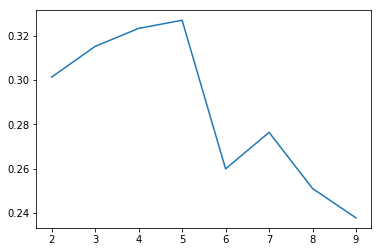

In [38]:
plt.plot(pd.DataFrame(ss)[0], pd.DataFrame(ss)[1]);

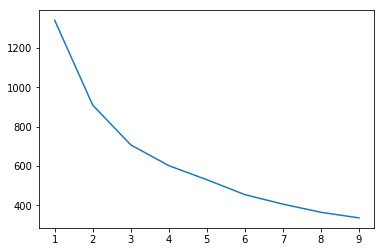

In [39]:
#Now let's proceed to the elbow curve method
ssd = []
for k in list(range(1,10)):
    model = KMeans(n_clusters = k, max_iter = 50).fit(df_pca3)
    ssd.append([k, model.inertia_])
    
plt.plot(pd.DataFrame(ssd)[0], pd.DataFrame(ssd)[1])

### From Silhoutte score analysis we are getting 5 clusters however by Elbow curve analysis we can observer to go with 3 clusters

### With cluster 3 I am presenting here and with 5 at the last 

In [40]:
#Let's perform K means using K=3
model_clus2 = KMeans(n_clusters = 3, max_iter = 50, random_state = 50)
model_clus2.fit(df_pca3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=50, tol=0.0001, verbose=0)

In [41]:
# Let's add the cluster Ids to the PCs data 
dat_km = pd.concat([df_pca2.reset_index().drop('index', axis = 1), pd.Series(model_clus2.labels_)], axis = 1)
dat_km.columns = ['country', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5','ClusterID']
dat_km.head()

,country,PC1,PC2,PC3,PC4,PC5,ClusterID
0,Afghanistan,-2.899440,-0.210920,-0.794008,0.808073,-0.151098,2
1,Albania,0.571663,-0.365855,-0.285368,-1.233879,0.278467,1
2,Algeria,-0.082299,-0.334262,1.307774,-0.813505,0.215401,1
3,Angola,-2.830780,1.451765,1.559083,1.124602,-0.375038,2
4,Antigua and Barbuda,1.295018,0.323543,-0.154906,-0.664375,-0.173215,1


In [42]:
# Check the count of observation per cluster
dat_km['ClusterID'].value_counts()

1    83
2    45
0    30
Name: ClusterID, dtype: int64

In [43]:
# Merging on 'ID'
df_M = pd.merge(df, dat_km, how='inner', on='country')
df_M.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,PC5,ClusterID
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,-2.899440,-0.210920,-0.794008,0.808073,-0.151098,2
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,0.571663,-0.365855,-0.285368,-1.233879,0.278467,1
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,-0.082299,-0.334262,1.307774,-0.813505,0.215401,1
3,Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0,-2.830780,1.451765,1.559083,1.124602,-0.375038,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,1.295018,0.323543,-0.154906,-0.664375,-0.173215,1


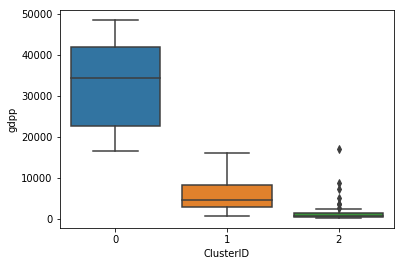

In [44]:
# plot ClusterID vs gdpp
sns.boxplot(x='ClusterID', y='gdpp', data=df_M)

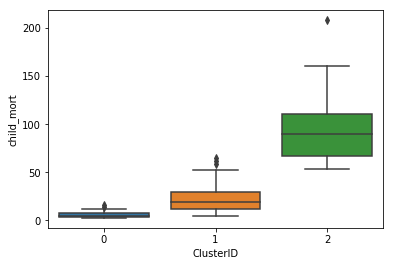

In [45]:
# plot ClusterID vs child_mort
sns.boxplot(x='ClusterID', y='child_mort', data=df_M)

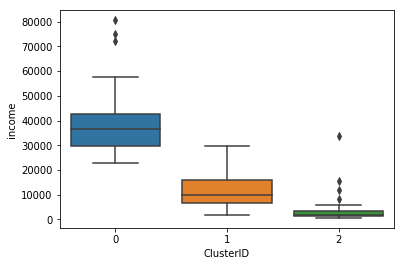

In [46]:
# plot ClusterID vs income
sns.boxplot(x='ClusterID', y='income', data=df_M)

## From the above boxplot it's evident for the clusters income & gdpp is HIGH for those child_mort is LOW

## And vice versa

In [47]:
df_M.drop(['PC1', 'PC2', 'PC3', 'PC4', 'PC5'], axis=1, inplace=True)

In [48]:
# Let's create cluster profile

child_M = pd.DataFrame(df_M.groupby(['ClusterID']).child_mort.mean())
income = pd.DataFrame(df_M.groupby(['ClusterID']).income.mean())
gdpp = pd.DataFrame(df_M.groupby(['ClusterID']).gdpp.mean())
df_GroupBy = pd.concat([child_M, income, gdpp], axis=1)
df_GroupBy

,child_mort,income,gdpp
ClusterID,,,
0,6.036667,40126.666667,33256.666667
1,22.772289,11398.433735,5892.915663
2,95.106667,3539.844444,1766.711111


### Per K-means - List of counties which would need support for LOW gdpp & income and HIGH on child_mort

In [49]:
df_M[df_M['ClusterID']==2]['country']

0                   Afghanistan
3                        Angola
16                        Benin
24                 Burkina Faso
25                      Burundi
27                     Cameroon
30     Central African Republic
31                         Chad
35                      Comoros
36             Congo, Dem. Rep.
37                  Congo, Rep.
39                Cote d'Ivoire
47            Equatorial Guinea
48                      Eritrea
53                        Gabon
54                       Gambia
57                        Ghana
61                       Guinea
62                Guinea-Bissau
64                        Haiti
77                        Kenya
78                     Kiribati
81                          Lao
84                      Lesotho
85                      Liberia
89                   Madagascar
90                       Malawi
93                         Mali
95                   Mauritania
102                  Mozambique
104                     Namibia
107     

## Hierarchical Clustering Analysis by Single Linkage & Complete Linkage

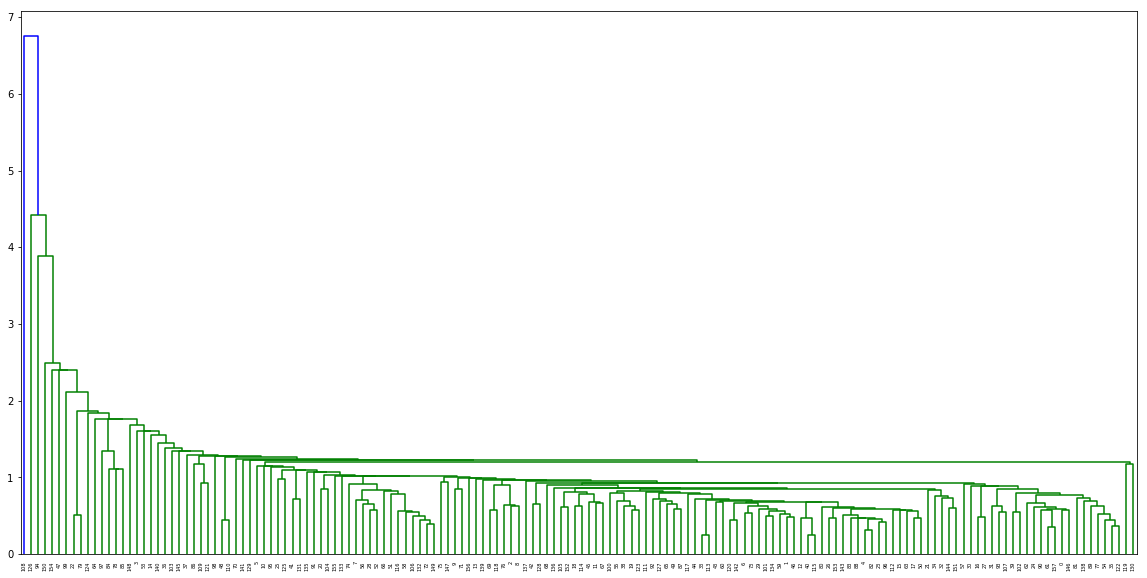

In [50]:
plt.figure(figsize = (20,10))        # Size of the figure
# single linkage
mergings = linkage(df_pca3, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

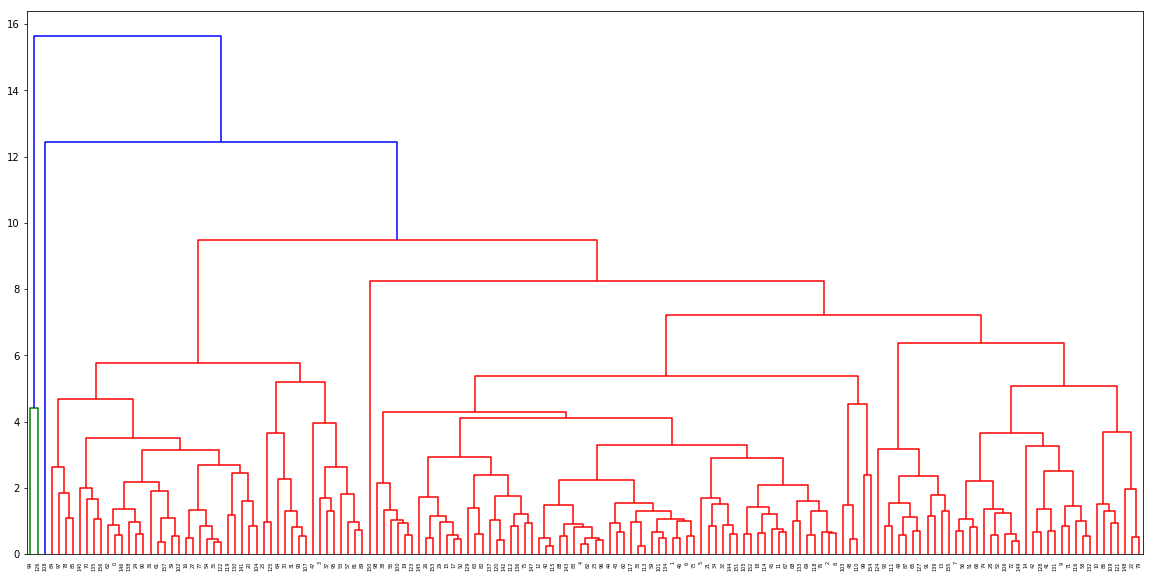

In [51]:
plt.figure(figsize = (20,10))        # Size of the figure
# complete linkage
mergings = linkage(df_pca3, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

### Looking into the Single and Complete linkage we can go by 4/5 section of clustering and we will analyze the result for the same. But we would prefer to go by 4 clusters as per the Complete linkage dendrogram

In [53]:
# 4 clusters
cluster_labels = cut_tree(mergings, n_clusters=4).reshape(-1, )
df_M["4_cluster_id"] = cluster_labels
df_M

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID,3_cluster_id,4_cluster_id
0,Afghanistan,90.2,10.00,7.58,44.9,1610.0,9.440,56.2,5.82,553.0,2,0,0
1,Albania,16.6,28.00,6.55,48.6,9930.0,4.490,76.3,1.65,4090.0,1,0,1
2,Algeria,27.3,38.40,4.17,31.4,12900.0,16.100,76.5,2.89,4460.0,1,0,1
3,Angola,119.0,62.30,2.85,42.9,5900.0,22.400,60.1,6.16,3530.0,2,0,0
4,Antigua and Barbuda,10.3,45.50,6.03,58.9,19100.0,1.440,76.8,2.13,12200.0,1,0,1
5,Argentina,14.5,18.90,8.10,16.0,18700.0,20.900,75.8,2.37,10300.0,1,0,1
6,Armenia,18.1,20.80,4.40,45.3,6700.0,7.770,73.3,1.69,3220.0,1,0,1
7,Austria,4.3,51.30,11.00,47.8,43200.0,0.873,80.5,1.44,46900.0,0,0,1
8,Azerbaijan,39.2,54.30,5.88,20.7,16000.0,13.800,69.1,1.92,5840.0,1,0,1
9,Bahamas,13.8,35.00,7.89,43.7,22900.0,-0.393,73.8,1.86,28000.0,0,0,1


In [54]:
# 5 clusters
cluster_labels = cut_tree(mergings, n_clusters=5).reshape(-1, )
df_M["5_cluster_id"] = cluster_labels
df_M

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID,3_cluster_id,4_cluster_id,5_cluster_id
0,Afghanistan,90.2,10.00,7.58,44.9,1610.0,9.440,56.2,5.82,553.0,2,0,0,0
1,Albania,16.6,28.00,6.55,48.6,9930.0,4.490,76.3,1.65,4090.0,1,0,1,1
2,Algeria,27.3,38.40,4.17,31.4,12900.0,16.100,76.5,2.89,4460.0,1,0,1,1
3,Angola,119.0,62.30,2.85,42.9,5900.0,22.400,60.1,6.16,3530.0,2,0,0,0
4,Antigua and Barbuda,10.3,45.50,6.03,58.9,19100.0,1.440,76.8,2.13,12200.0,1,0,1,1
5,Argentina,14.5,18.90,8.10,16.0,18700.0,20.900,75.8,2.37,10300.0,1,0,1,1
6,Armenia,18.1,20.80,4.40,45.3,6700.0,7.770,73.3,1.69,3220.0,1,0,1,1
7,Austria,4.3,51.30,11.00,47.8,43200.0,0.873,80.5,1.44,46900.0,0,0,1,1
8,Azerbaijan,39.2,54.30,5.88,20.7,16000.0,13.800,69.1,1.92,5840.0,1,0,1,1
9,Bahamas,13.8,35.00,7.89,43.7,22900.0,-0.393,73.8,1.86,28000.0,0,0,1,1


In [56]:
df_M["4_cluster_id"].value_counts()

1    110
0     45
2      2
3      1
Name: 4_cluster_id, dtype: int64

In [57]:
df_M["5_cluster_id"].value_counts()

1    109
0     45
2      2
4      1
3      1
Name: 5_cluster_id, dtype: int64

In [61]:
# Let's create cluster profile

child_M4 = pd.DataFrame(df_M.groupby(['4_cluster_id']).child_mort.mean())
income4 = pd.DataFrame(df_M.groupby(['4_cluster_id']).income.mean())
gdpp4 = pd.DataFrame(df_M.groupby(['4_cluster_id']).gdpp.mean())
df_GroupBy4 = pd.concat([child_M4, income4, gdpp4], axis=1)
df_GroupBy4

,child_mort,income,gdpp
4_cluster_id,,,
0,91.820000,3950.733333,1985.777778
1,18.904545,18416.636364,12790.218182
2,4.800000,50200.000000,33850.000000
3,130.000000,5150.000000,2330.000000


In [62]:
df_M[df_M['4_cluster_id']==3]['country']

108    Nigeria
Name: country, dtype: object

In [63]:
df_M[df_M['4_cluster_id']==0]['country']

0                   Afghanistan
3                        Angola
16                        Benin
20                     Botswana
24                 Burkina Faso
25                      Burundi
27                     Cameroon
30     Central African Republic
31                         Chad
35                      Comoros
36             Congo, Dem. Rep.
37                  Congo, Rep.
39                Cote d'Ivoire
47            Equatorial Guinea
53                        Gabon
54                       Gambia
57                        Ghana
61                       Guinea
62                Guinea-Bissau
64                        Haiti
70                         Iraq
77                        Kenya
78                     Kiribati
81                          Lao
84                      Lesotho
85                      Liberia
89                   Madagascar
90                       Malawi
93                         Mali
95                   Mauritania
97        Micronesia, Fed. Sts.
102     

### Looking into the Heirarchical Clustering it;s evident both 4 & 5 clustering gives us more of same results. 

### Here we have Nigeria as the first country followed by rest 45 counties which should be targetted 

In [64]:
# Let's create cluster profile

child_M5 = pd.DataFrame(df_M.groupby(['5_cluster_id']).child_mort.mean())
income5 = pd.DataFrame(df_M.groupby(['5_cluster_id']).income.mean())
gdpp5 = pd.DataFrame(df_M.groupby(['5_cluster_id']).gdpp.mean())
df_GroupBy5 = pd.concat([child_M5, income5, gdpp5], axis=1)
df_GroupBy5

,child_mort,income,gdpp
5_cluster_id,,,
0,91.820000,3950.733333,1985.777778
1,19.011009,18132.385321,12463.522936
2,4.800000,50200.000000,33850.000000
3,130.000000,5150.000000,2330.000000
4,7.300000,49400.000000,48400.000000


In [65]:
df_M[df_M['5_cluster_id']==3]['country']

108    Nigeria
Name: country, dtype: object

In [66]:
df_M[df_M['5_cluster_id']==0]['country']

0                   Afghanistan
3                        Angola
16                        Benin
20                     Botswana
24                 Burkina Faso
25                      Burundi
27                     Cameroon
30     Central African Republic
31                         Chad
35                      Comoros
36             Congo, Dem. Rep.
37                  Congo, Rep.
39                Cote d'Ivoire
47            Equatorial Guinea
53                        Gabon
54                       Gambia
57                        Ghana
61                       Guinea
62                Guinea-Bissau
64                        Haiti
70                         Iraq
77                        Kenya
78                     Kiribati
81                          Lao
84                      Lesotho
85                      Liberia
89                   Madagascar
90                       Malawi
93                         Mali
95                   Mauritania
97        Micronesia, Fed. Sts.
102     

## From Silhoutte score analysis we are getting 5 clusters however by Elbow curve analysis we can observer to go with 3 clusters

### With cluster 5 I am presenting here and with 3 we have already presented before

In [68]:
#Let's perform K means using K=5
model_clus5 = KMeans(n_clusters = 5, max_iter = 50, random_state = 50)
model_clus5.fit(df_pca3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=50, tol=0.0001, verbose=0)

In [69]:
# Let's add the cluster Ids to the PCs data 
dat_km5 = pd.concat([df_pca2.reset_index().drop('index', axis = 1), pd.Series(model_clus5.labels_)], axis = 1)
dat_km5.columns = ['country', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5','ClusterID']
dat_km5.head()

,country,PC1,PC2,PC3,PC4,PC5,ClusterID
0,Afghanistan,-2.899440,-0.210920,-0.794008,0.808073,-0.151098,1
1,Albania,0.571663,-0.365855,-0.285368,-1.233879,0.278467,3
2,Algeria,-0.082299,-0.334262,1.307774,-0.813505,0.215401,0
3,Angola,-2.830780,1.451765,1.559083,1.124602,-0.375038,1
4,Antigua and Barbuda,1.295018,0.323543,-0.154906,-0.664375,-0.173215,3


In [70]:
# Check the count of observation per cluster
dat_km5['ClusterID'].value_counts()

3    48
1    45
0    39
2    24
4     2
Name: ClusterID, dtype: int64

In [71]:
# Merging on 'ID'
df_M5 = pd.merge(df, dat_km5, how='inner', on='country')
df_M5.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,PC5,ClusterID
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,-2.899440,-0.210920,-0.794008,0.808073,-0.151098,1
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,0.571663,-0.365855,-0.285368,-1.233879,0.278467,3
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,-0.082299,-0.334262,1.307774,-0.813505,0.215401,0
3,Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0,-2.830780,1.451765,1.559083,1.124602,-0.375038,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,1.295018,0.323543,-0.154906,-0.664375,-0.173215,3


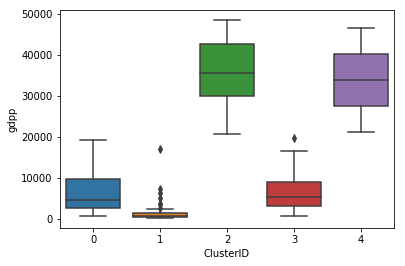

In [72]:
# plot ClusterID vs gdpp
sns.boxplot(x='ClusterID', y='gdpp', data=df_M5)

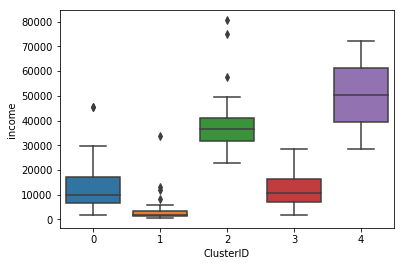

In [73]:

# plot ClusterID vs gdpp
sns.boxplot(x='ClusterID', y='income', data=df_M5)

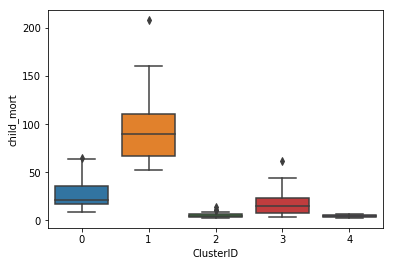

In [74]:

# plot ClusterID vs gdpp
sns.boxplot(x='ClusterID', y='child_mort', data=df_M5)

In [75]:
df_M5.drop(['PC1', 'PC2', 'PC3', 'PC4', 'PC5'], axis=1, inplace=True)

In [76]:
# Let's create cluster profile

child_M = pd.DataFrame(df_M5.groupby(['ClusterID']).child_mort.mean())
income = pd.DataFrame(df_M5.groupby(['ClusterID']).income.mean())
gdpp = pd.DataFrame(df_M5.groupby(['ClusterID']).gdpp.mean())
df_GroupByM5 = pd.concat([child_M, income, gdpp], axis=1)
df_GroupByM5

,child_mort,income,gdpp
ClusterID,,,
0,27.853846,13026.923077,6241.435897
1,94.857778,3493.177778,1713.377778
2,5.570833,39966.666667,35625.000000
3,17.766667,12173.333333,6731.166667
4,4.800000,50200.000000,33850.000000


In [77]:
df_M5[df_M5['ClusterID']==1]['country']

0                   Afghanistan
3                        Angola
16                        Benin
20                     Botswana
24                 Burkina Faso
25                      Burundi
27                     Cameroon
30     Central African Republic
31                         Chad
35                      Comoros
36             Congo, Dem. Rep.
37                  Congo, Rep.
39                Cote d'Ivoire
47            Equatorial Guinea
48                      Eritrea
54                       Gambia
57                        Ghana
61                       Guinea
62                Guinea-Bissau
64                        Haiti
77                        Kenya
78                     Kiribati
81                          Lao
84                      Lesotho
85                      Liberia
89                   Madagascar
90                       Malawi
93                         Mali
95                   Mauritania
102                  Mozambique
104                     Namibia
107     

## Silhoutte score analysis with 5 clusters and Elbow curve analysis with 3 cluster and complete linkage analysis gives us the same answer

## However during Heirarchiacal Clustering with 4/5 also we got the same results. This helps us to conclude the final list of Countries 